In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
path=r"F:\机器学习\吴恩达作业\machine-learning-ex2\ex2"

In [5]:
path1=path+"\ex2data1.txt"

In [6]:
data1=pd.read_csv(path1,names=["Exam1","Exam2","label"])

In [7]:
data1.head()

,Exam1,Exam2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [8]:
def Init_data_plot(data):
    fig,ax=plt.subplots(figsize=(12,8))
    ax.scatter(data1[data1["label"]==0]["Exam1"],data1[data1["label"]==0]["Exam2"])
    ax.scatter(data1[data1["label"]==1]["Exam1"],data1[data1["label"]==1]["Exam2"])
    plt.show()

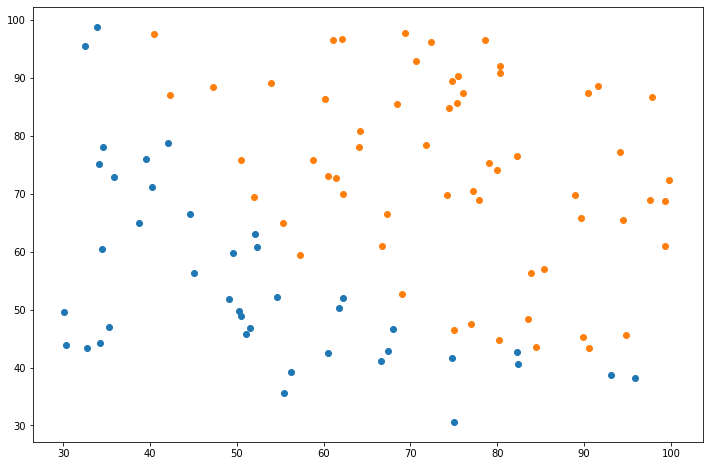

In [9]:
Init_data_plot(data1)

In [10]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [11]:
####实现损失函数
####内部要把类似excel表的数据转化为矩阵
def  Calculate_cost(theta,X,y):
    X = np.matrix(X)
    y = np.matrix(y).T
    theta = np.matrix(theta)
    left=-(y.T).dot(np.log(sigmoid(theta.dot(X.T))).T)
    right= -((1-y).T).dot(np.log(1-(sigmoid(theta.dot(X.T))).T))
    return np.sum(left+right)/len(X)

In [12]:
######数据加上偏移项

In [15]:
data1.insert(0,"ones",1)

In [16]:
Calculate_cost(theta=np.zeros(3),X=data1.iloc[:,:3],y=data1.iloc[:,3])

0.6931471805599453

In [17]:
####配合使用优化的包构造梯度函数
def calculate_gradient(theta,X,y):
    X = np.matrix(X)
    y = np.matrix(y).T
    theta = np.matrix(theta)
    mid=sigmoid(theta.dot(X.T)).T-y
    return ((mid.T).dot(X))/(len(X))

In [18]:
theta=np.zeros(3)

In [19]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=Calculate_cost, x0=theta, fprime=calculate_gradient,args=(data1.iloc[:,:3],data1.iloc[:,3]))
result

(array([-25.1613186 ,   0.20623159,   0.20147149]), 36, 0)

In [20]:
######应该自己实现一遍梯度下降算法
######ax+by+c=0

In [21]:
data1.head()

,ones,Exam1,Exam2,label
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [22]:
def data_divide_plot(data,result):
    fig,ax=plt.subplots(figsize=(12,8))
    ax.scatter(data1[data1["label"]==0]["Exam1"],data1[data1["label"]==0]["Exam2"])
    ax.scatter(data1[data1["label"]==1]["Exam1"],data1[data1["label"]==1]["Exam2"])
    x_plot=np.linspace(data1.iloc[:,1],100)
    y_plot=-1*(result[0][1]*x_plot+result[0][0])/result[0][2]
    plt.plot(x_plot,y_plot)

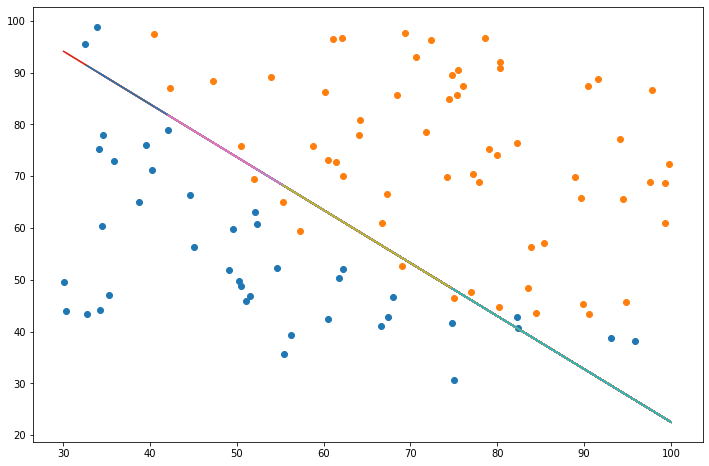

In [23]:
data_divide_plot(data=data1,result=result)

In [24]:
def score(theta,X):
    return sigmoid(theta.dot(X))

In [25]:
score(result[0],[1,45,85])  ###########验证成功

0.7762906239711086

In [26]:
#####实现一个预测并且统计准确率的功能

In [27]:
def judge(theta,X):
    if score(theta,X)<0.5:
        return 0
    else:
        return 1

In [39]:
result

(array([-25.1613186 ,   0.20623159,   0.20147149]), 36, 0)

In [41]:
theta=result[0]

In [42]:
def calculate_accuracy(data,theta):
    right=0
    for i in range(len(data)):
        if (judge(theta,data.iloc[i,:3])==data.iloc[i,3]):
            right=right+1
    return right/(len(data))

In [43]:
 calculate_accuracy(data=data1,theta=theta)

0.89

In [44]:
#########处理第二份数据

In [98]:
path2=path+"/ex2data2.txt"

In [99]:
data2 = pd.read_csv(path2, header=None, names=['Test1', 'Test2', 'Accepted'])

In [100]:
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [101]:
##########同样先画出数据看一下

In [102]:
def Init_data2_plot(data):
    fig,ax=plt.subplots(figsize=(12,8))
    ax.scatter(data2[data2["Accepted"]==0]["Test1"],data2[data2["Accepted"]==0]["Test2"])
    ax.scatter(data2[data2["Accepted"]==1]["Test1"],data2[data2["Accepted"]==1]["Test2"])
    plt.show()

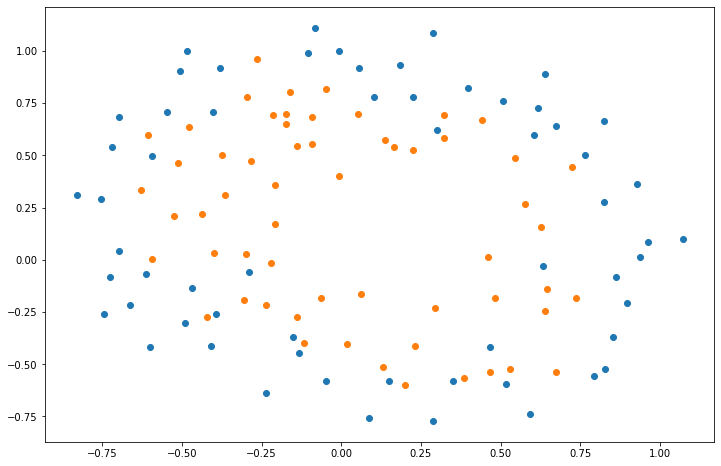

In [103]:
Init_data2_plot(data2)

In [56]:
########这数据做不了啊,参考了NG的作业提示，需要用到映射

In [104]:
data2.insert(3,"one3",1)

In [106]:
data2.head()

,Test1,Test2,Accepted,one3
0,0.051267,0.69956,1,1
1,-0.092742,0.68494,1,1
2,-0.213710,0.69225,1,1
3,-0.375000,0.50219,1,1
4,-0.513250,0.46564,1,1


In [107]:
def map_feature(data):
    data2=data
    for i in range(7):
        for j in range(7-i):
            data2[str(i)+str(j)]=np.power(data2["Test1"],i)*np.power(data2["Test1"],j)
    return data2

In [109]:
new_data2=map_feature(data=data2)

In [110]:
new_data2.head()

,Test1,Test2,Accepted,one3,00,01,02,03,04,05,...,30,31,32,33,40,41,42,50,51,60
0,0.051267,0.69956,1,1,1.0,0.051267,0.002628,0.000135,0.000007,3.541519e-07,...,0.000135,0.000007,3.541519e-07,1.815630e-08,0.000007,3.541519e-07,1.815630e-08,3.541519e-07,1.815630e-08,1.815630e-08
1,-0.092742,0.68494,1,1,1.0,-0.092742,0.008601,-0.000798,0.000074,-6.860919e-06,...,-0.000798,0.000074,-6.860919e-06,6.362953e-07,0.000074,-6.860919e-06,6.362953e-07,-6.860919e-06,6.362953e-07,6.362953e-07
2,-0.213710,0.69225,1,1,1.0,-0.213710,0.045672,-0.009761,0.002086,-4.457837e-04,...,-0.009761,0.002086,-4.457837e-04,9.526844e-05,0.002086,-4.457837e-04,9.526844e-05,-4.457837e-04,9.526844e-05,9.526844e-05
3,-0.375000,0.50219,1,1,1.0,-0.375000,0.140625,-0.052734,0.019775,-7.415771e-03,...,-0.052734,0.019775,-7.415771e-03,2.780914e-03,0.019775,-7.415771e-03,2.780914e-03,-7.415771e-03,2.780914e-03,2.780914e-03
4,-0.513250,0.46564,1,1,1.0,-0.513250,0.263426,-0.135203,0.069393,-3.561597e-02,...,-0.135203,0.069393,-3.561597e-02,1.827990e-02,0.069393,-3.561597e-02,1.827990e-02,-3.561597e-02,1.827990e-02,1.827990e-02


In [111]:
###############之后步骤只是多了个正则化和前面没有什么不同，略过